This is the Import statements required for the data

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.Series.__unicode__ = pd.Series.to_string
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
import plotting

In [3]:
import copy

In [4]:
import getDataFrameExtended as getdata

In [5]:
import utils

In [6]:
import StudentAnalysis

1683
11.611489942038869
41.932281059063136
11.611489942038869
41.932281059063136
cats


In [7]:
df=pd.read_csv("./census2011.csv")

In [8]:
df.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2


This takes the dataset, and then runs a function which translates all of the codes in the dataset to their corresponding values, as defined in MicroDataTeachingVariables pdf.

In [9]:
newdf = copy.deepcopy(df)
utils.translate(newdf)

In [10]:
newdf.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,North East,Not Resident,Married/Civil Partnership,Usual Resident,Female,55 to 64,Married/Civil Partnership,False,UK,Good Health,White,Christian,Retired,"Process, Plant and Machine Operatives",Mining and Quarrying,No Code Required,DE
1,7394745,North East,Not Resident,Lone Parent Family (Female),Usual Resident,Male,35 to 44,Single (Never Married/Civil Partnership),False,UK,Very Good Health,White,Christian,Employee,"Process, Plant and Machine Operatives",Transport and Storage,49 or More Hours,C2
2,7395066,North East,Not Resident,Cohabiting Couple Family,Usual Resident,Female,35 to 44,Single (Never Married/Civil Partnership),False,UK,Very Good Health,White,No Religion,Employee,"Caring, Leisure and Other Service",Human Health and Social Work,31 to 48 Hours,DE
3,7395329,North East,Not Resident,Cohabiting Couple Family,Usual Resident,Female,16 to 24,Single (Never Married/Civil Partnership),False,UK,Good Health,White,Christian,Employee,Sales and Customer Service,Financial and Insurance,31 to 48 Hours,C1
4,7394712,North East,Not Resident,Cohabiting Couple Family,Usual Resident,Male,45 to 54,Divorced or Formerly in a Civil Partnership,False,UK,Very Good Health,White,Christian,Employee,"Managers, Directors and Senior Officials",Wholesale and Retail Trade,31 to 48 Hours,C1


Basic Requirement Number 2

This returns the number of records in the dataset by counting the number of rows.

In [ ]:
#Basic Requirement 2.1
print("The number of records is " + str(len(df)))

This gets all of the data types for all of the columns in the dataset

In [ ]:
#Basic Requirement 2.2
print("All Data Types:\n" + str(df.dtypes))

To find all of the values in all of the columns, apart from the PersonID column, and the number of occurrences for each of the values, a value_counts was run across all of the columns, which got all of the unique values ion each column and the count of how many times each value occurred. 

In [ ]:
#Basic Requirement 2.3
for column in newdf:
    if (column != "Person ID"):
        print(str(column)+ " Counts\n" +str(newdf[column].value_counts()) + "\n")

Plotting Graph Basic Requirements 3

Examining a sample of the consensus, it appears that the regions of the South East of England and London have the highest populations, and Wales and the North East of England have the smallest population by region in the UK.

In [ ]:
# Number of Records per region
plt.figure(figsize=(12, 9))
plotting.plot_bar_group_count(
    newdf,
    'Region',
    'Frequencies of Resident Regions in 2011 Census',
);

Examining the graph, it appears that the largest Employment group has no code for it in the census data which means that the largest group of people are people aged under 16, people who have never worked and students or schoolchildren living away during term-time. Amongst the rest of the data, The largest groups are elementary occupations or professional groups. The smallest group is the Process, Plant, and Machine Operatives.

In [ ]:
# Number of records per occupation
plt.figure(figsize=(15, 9))
plotting.plot_bar_group_count(
    newdf,
    'Occupation',
    'Frequencies of Resident Occupations in 2011 Census',
);

With regards to age, the largest group are children under the age of 15. The smallest group are people over the age of 75. However an interesting point to note is that between the ages of 16 and 64, the group sizes are very similar. 

In [ ]:
#Pie Chart for Distrubition of the sample by age
plt.figure(figsize=(12, 9))
plotting.plot_pie_group_count(
    newdf,
    'Age',
    'Proportions of Resident Ages in 2011 Census',
)

Examining the Distrubution by economic activity, by far the largest group is the group of people who are employed. The second biggest group is the group or which there is no code, which means that they are either children under the age of 16, full time students, or schoolchildren who live elsewhere during termtime. There is also a large group of people who are retired, which contributes to the idea of an aging population in the UK. Apart from that, the group sizes are fairly similar, in that they range from around 2% of the total to around 7 % of the total. 

In [ ]:
#Pie Chart for Distrubition of the sample by economic activity
plt.figure(figsize=(12, 9))
plotting.plot_pie_group_count(
    newdf,
    'Economic Activity',
    'Proportions of Resident Economic Activity in 2011 Census',
)

Easy Extension 1

For all Industries apart from agriculture, London has a far higher number of people working in all industries than the rest of the regions, especially the north east of England, which has significantly lower number of people working in all industries than the rest of the country
Also, agriculture is the lowest industry in terms of numbers anywhere in the country, which suggests that a significantly smaller number of people work in agriculture than any other industry. 

In [ ]:
#Easy Extension 1 part 1 Using crosstab
dfeasy11 = pd.crosstab(newdf['Region'], newdf['Industry'])
dfeasy11

Examining, the approximated social grade and occuption, by far the largest cell is the no code required cell for both of the parameters. As the social grades change, the largest occupation in that group also changes, for example in the social group AB, the highest social code, the highest numbers of people are employed in Managerial/Professional occupations, generally high paying jobs, whereas, in the social code of DE, the lowest social code, the highest numbers of people seen to be employed in the Elementary/Process Operatives occupations, which tends to be a lower paid occupation than Managers or professionals. Furthermore, the no code required is significantly higher for the slightly lower social codes than for the highest social code.

In [ ]:
#Easy Extension 1 part 2 using crosstab
dfeasy12 = pd.crosstab(newdf['Occupation'], newdf['Approximated Social Grade'])
dfeasy12

In [ ]:
#Easy 1 part 1 using GroupBy
easy11 = newdf.groupby(['Region','Industry'])['Person ID'].count()
easy11 = pd.Series.to_frame(easy11)
easy11.columns.values[0] = 'Counts'
easy11

In [ ]:
#Easy 1 part 2 using GroupBy
easy12 = newdf.groupby(['Occupation','Approximated Social Grade'])['Person ID'].count()
easy12 = pd.Series.to_frame(easy12)
easy12.columns.values[0] = 'Counts'
easy12

Easy Extension 2 Parts 1 and 2 -Part 3 was filtered in the Dataset to begin with

In [ ]:
#Filtering the Dataset to be economic code from 1-4
ea = df[df["Economic Activity"].isin(range(1, 5))]
ea = copy.deepcopy(ea)
utils.translate(ea)

Analysing the number of economically active people by region, we find that that the largest number of people are in the south west and London, an explanation could be that there are more people living in those regions of the UK, than the other regions on the UK, and they could be the highest number of economically active people for any region, contrasted with the North East, and Wales, which both have significantly lower number of economically active people than the other regions of the UK.

In [ ]:
# Easy 2 Part 1 using CrossTab
easy21 = pd.crosstab(index = (ea)['Region'], columns = 'count')
easy21 = easy21.sort_values(['count'],ascending = 0)
easy21

In [ ]:
EconomicallyActivePeopleGraphRegion = easy21.plot(kind = "barh",legend = False,title = "Count of Economically Active People By Region",figsize=(7,4))
EconomicallyActivePeopleGraphRegion.set_xlabel("Region")
EconomicallyActivePeopleGraphRegion.set_ylabel("Count")
EconomicallyActivePeopleGraphRegion;

Examining the number of economically active people by age, the largest groups are the groups of 25 to 44, which would be logical, due to the largest number of people being in those categories. Furthermore, the numbers of economically people over the age of 65 is significantly lower, one of the reasons being perhaps that a lot of those people are retired and thus not economically active.

In [ ]:
# Easy 2 Part 2 using CrossTab
easy22 = pd.crosstab(index = (ea)['Age'], columns = 'count')
easy22 = easy22.sort_values(['count'],ascending = 0)
easy22

In [ ]:
EconomicallyActivePeopleGraphAge = easy22.plot(kind = "barh",legend = False,title = "Count of Economically Active People By Age",figsize=(7,4))
EconomicallyActivePeopleGraphAge.set_xlabel("Age")
EconomicallyActivePeopleGraphAge.set_ylabel("Count")
EconomicallyActivePeopleGraphAge;

In [ ]:
plt.figure(figsize=(10, 10))
plotting.plot_3d_table_count(
        newdf,
        'Region',
        'Industry',
        'Frequencies Residents by Region and Industry in 2011 Census',
        'Region',
        'Industry',
);

ipywidgets to analyse the number of people working in industry for different regions and ages. Age had to be a drop down box as opposed to a slider due to the fact that in the amended dataframe, the age is no londer a code, but is instead a string. 

In [ ]:
def industryfunc(Region,Age):
    temp = newdf[(newdf['Region'] == Region) & (newdf['Age'] == Age)]
    name = "Industry count of ages " + Age +" in " + Region
    plt.figure(figsize=(10, 10))
    plotting.plot_bar_group_count(
        temp, 
        'Industry', 
        name,
        wrap_chars = 20
    )
regionvalues = newdf.Region.unique()
regionvalues = regionvalues.tolist()

agevalues = newdf.Age.unique()
agevalues = agevalues.tolist()

interact(industryfunc, Region=regionvalues,Age=(agevalues));

Extension analysis of the dataset

The data set which we chose to analyse for our extension was the dataset of all of the balls bowled in the Group Stages of the Indian Premier League cricket competition in 2016. The data was sourced from the following website: http://cricsheet.org/downloads/ in the IPL competition section of the page. All of the .csv files not from the group stages were filtered out and then the remaining files were parsed into the program.

In [11]:
IPLData = getdata.getData()

Sample of how the dataset looks after being parsed into the program. 

In [12]:
IPLData.head()

,Match Number,Winner,Venue,Innings,Bowling Team,Ball No.,Batting Team,Striker,Non - Striker,Bowler,Runs,Extras,How Out,Batsman Out
1115,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.1,Mumbai Indians,LMP Simmons,RG Sharma,RP Singh,1,0,-,-
1116,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.2,Mumbai Indians,RG Sharma,LMP Simmons,RP Singh,0,0,-,-
1117,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.3,Mumbai Indians,RG Sharma,LMP Simmons,RP Singh,2,0,-,-
1118,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.4,Mumbai Indians,RG Sharma,LMP Simmons,RP Singh,4,0,-,-
1119,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.5,Mumbai Indians,RG Sharma,LMP Simmons,RP Singh,1,0,-,-


In [13]:
#Number of each type of Runs by ball for each venue
numGameAtVenue = IPLData.drop_duplicates('Match Number')['Venue'].value_counts()
numGameAtVenue
def getNoGames(row):
    venueCount = numGameAtVenue.index == row.name
    venueCount = numGameAtVenue[list(venueCount).index(True)]
    temp = (row / venueCount)
    return temp.astype(int)

Total_Runs = IPLData['Runs'] + IPLData['Extras']
Total_Runs = Total_Runs.rename('No. Of Runs on Ball')
Total_Runs = pd.crosstab(IPLData['Venue'],Total_Runs)
Total_Runs = Total_Runs.apply(getNoGames,axis =1)
del Total_Runs[7]
Total_Runs

No. Of Runs on Ball,0,1,2,3,4,5,6
Venue,,,,,,,
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,90,92,12,1,23,0,10
Eden Gardens,76,91,16,0,25,1,10
Feroz Shah Kotla,75,107,17,0,25,0,10
Green Park,82,93,7,0,30,1,10
M Chinnaswamy Stadium,73,100,13,0,30,0,18
Maharashtra Cricket Association Stadium,66,118,21,1,28,0,11
"Punjab Cricket Association IS Bindra Stadium, Mohali",67,107,24,0,32,0,7
"Rajiv Gandhi International Stadium, Uppal",83,97,18,1,23,0,8
Saurashtra Cricket Association Stadium,70,103,24,1,28,0,6


When analysing the stadia, the data had to be edited to account for the fact that not equal numbers of matches were played at all of the grounds, thus to make the data fair, all values were averaged out to for each mat
Looking at the number of each ball appearing at each venue The two most common values for balls at any ground were dot balls and 1's, which is logical as they are the type of runs which are the easiest to score for both the batting and the bowling side. 


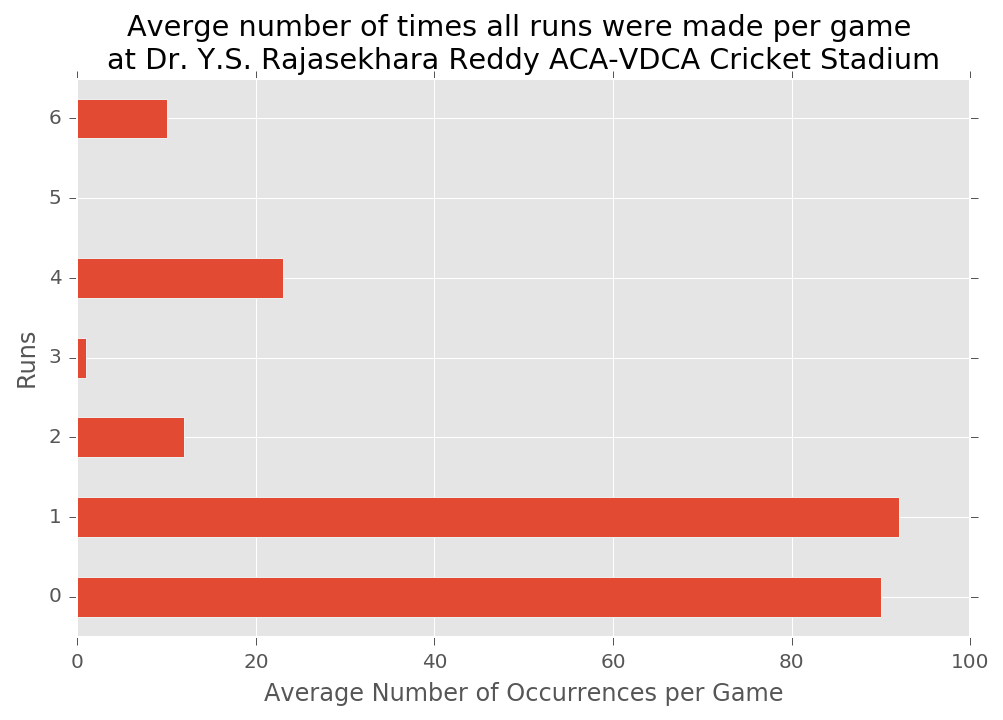

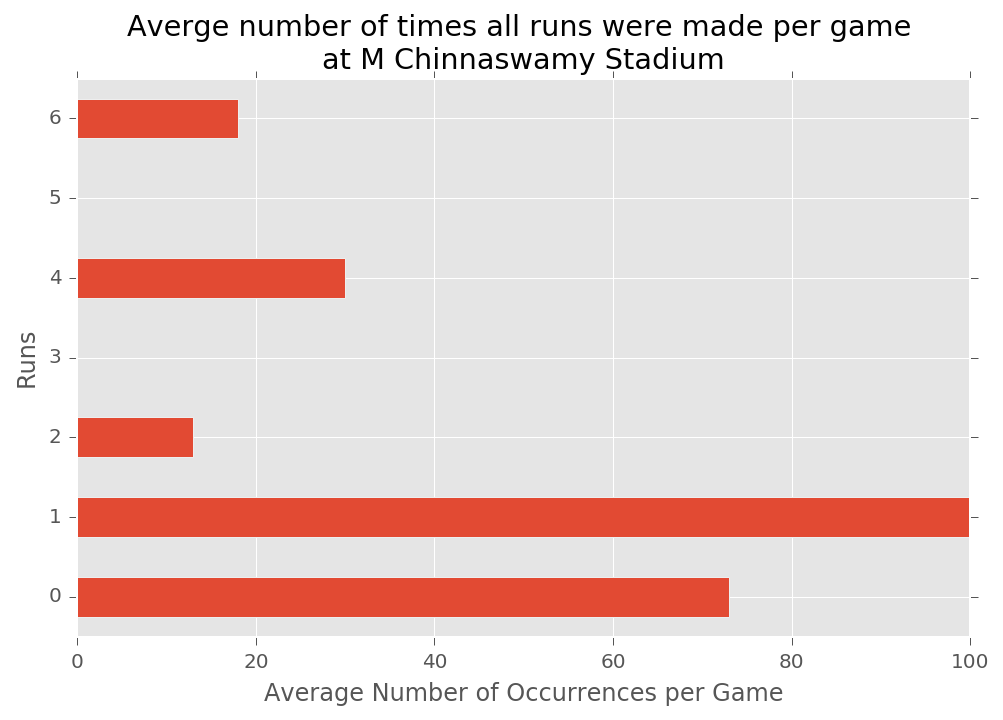

In [14]:
def FrequencyOfRunsStadiumFunc(Balls_Per_Venue):
    stadia = Total_Runs.loc[Balls_Per_Venue]
    stadia = pd.DataFrame(stadia)
    BallStadiumGraph = stadia.plot(kind ="Barh",legend = False,figsize=(8,5),title = "Averge number of times all runs were made per game \nat "+ Balls_Per_Venue)
    BallStadiumGraph.set_xlabel("Average Number of Occurrences per Game")
    BallStadiumGraph.set_ylabel("Runs")
    
stadiaRuns = list(Total_Runs.index)
interact(FrequencyOfRunsStadiumFunc, Balls_Per_Venue=stadiaRuns);

Examining the data, the ground at which the most number of sixes was the M Chinnaswamy stadium, a ground which has a reputation for being one of the highest scoring grounds in the country.

In [ ]:
def stadiumFunc(Runs_Per_Ball_Per_Game):
    stadiumsBall = Total_Runs[int(Runs_Per_Ball_Per_Game)]
    stadiumsBallGraph = stadiumsBall.plot(kind ="Barh",figsize=(11,7),title = "Averge number of times " + Runs_Per_Ball_Per_Game + " runs were made per game in every stadium")
    stadiumsBallGraph.set_xlabel("Average Occurrence per Game")
    stadiumsBallGraph.set_ylabel("Stadium")
    
stadiaRuns = list(Total_Runs.columns.values)
interact(stadiumFunc, Runs_Per_Ball_Per_Game=stadiaRuns);

In [ ]:
#Number of each type of Runs by ball for each ball
totalRuns = IPLData['Runs'] + IPLData['Extras']
totalRuns = totalRuns.rename('No. Of Runs on Ball')
NumberRunsByBall = pd.crosstab(IPLData['Ball No.'],totalRuns)
NumberRunsByBall

Analysing the type and number of runs scored in each over, as the number of the over goes up, the frequency of boundaries also goes up. Furthermore, in the middle overs, i.e. between overs 7-15, the number of 1's and 2's goes up significantly as the batsmen looked to try and rotate strike. In the powerplay, there is an increased number of dots and an increased number of boundaries as compared to the middle overs as the batsmen look to try and score in the fielding restrictions. 

In [ ]:
def OverNum(Over_Number):
    OverRuns = NumberRunsByBall[(NumberRunsByBall.index < Over_Number) & (NumberRunsByBall.index>(Over_Number-1))]
    del OverRuns[7]
    OverRunsGraph = OverRuns.plot(kind ="Barh",figsize=(12,12),title = "Count of Run Type for each Ball in Over Number "+ str(Over_Number))
    OverRunsGraph.set_xlabel("Totals")
    OverRunsGraph.set_ylabel("Balls in Over "+ str(Over_Number))
    OverRunsGraph.legend(["Dot Ball","One Run","Two Runs","Three Runs", "Four Runs", "Five Runs","Six Runs"],loc='center left', bbox_to_anchor=(1.0, 0.5))
    OverRunsGraph
interact(OverNum, Over_Number=(1,20));

Comparing runs per innings, there is significantly more runs in the first innings overall, this makes sense due to the large number of wins, when the winning team was batting first ~ under half the time.

In [ ]:
# Runs by innings
InningsRuns = IPLData.groupby(['Innings'])['Runs'].sum()
InningsRuns = pd.Series.to_frame(InningsRuns)
InningsRuns

In [ ]:
InningRunsGraph = InningsRuns.plot(kind = "Barh",legend = False, figsize=(8,3),title = "Total Runs per Innings")
InningRunsGraph.set_xlabel("Innings Number")
InningRunsGraph.set_ylabel("Runs")
InningRunsGraph;

Comparing extras by Innings, there are far more extras in the second innings than the first innings, this would make sense as there would be far more pressure on the bowling team in the second innings which would lead to more mistakes than the (relatively) pressure free first innings

In [ ]:
# Extras by innings
InningsExtras = IPLData.groupby(['Innings'])['Extras'].sum()
InningsExtras = pd.Series.to_frame(InningsExtras)
InningsExtras

In [ ]:
InningExtrasGraph = InningsExtras.plot(kind = "Barh",legend = False, figsize=(8,3),title = "Total Extras per Innings")
InningExtrasGraph.set_xlabel("Innings Number")
InningExtrasGraph.set_ylabel("Extras")
InningExtrasGraph;

In [ ]:
# Type of Runs by Teams
teamRuns = IPLData['Runs'] + IPLData['Extras']
teamRuns = teamRuns.rename('Count of Run Type')
teamsRunTypes = pd.crosstab(IPLData['Batting Team'], teamRuns)
teamsRunTypes

In [ ]:
def frequencyRunTypeFunc(TeamName):
    teamRunsFrequency = teamsRunTypes.loc[TeamName]
    teamRunsFrequency = pd.DataFrame(teamRunsFrequency)
    TeamRunsFrequencyGraph = teamRunsFrequency.plot(kind ="Barh",legend = False,figsize=(8,5),title = "Averge number of times all runs were made by \n "+ TeamName)
    TeamRunsFrequencyGraph.set_xlabel("Total Occurrences")
    TeamRunsFrequencyGraph.set_ylabel("Runs")
    
teamNames = list(teamsRunTypes.index)
interact(frequencyRunTypeFunc, TeamName=teamNames)

In [ ]:
def runTypeFunc(RunType):
    teamRunTypes = teamsRunTypes[int(RunType)]
    teamRunTypesGraph = teamRunTypes.plot(kind ="Barh",figsize=(12,7),title = "Number of times " + RunType + " was scored by each team")
    teamRunTypesGraph.set_xlabel("Total Occurrences")
    teamRunTypesGraph.set_ylabel("Team")
    
TeamRunsTypesList = list(teamsRunTypes.columns.values)
interact(runTypeFunc, RunType=TeamRunsTypesList)

In [ ]:
# Top Wicket Takers in the IPL
def getBowlingTeam(row):
    record = allBowlers[allBowlers['Bowler'] == row.name]
    temp = record['Bowling Team']
    temp = temp.values 
    return temp
allBowlers = IPLData.drop_duplicates(subset = 'Bowler')
bowlerswickets = IPLData[((IPLData['How Out'] != '-') & (IPLData['How Out'] != 'run out'))]
allwickets = bowlerswickets['Bowler'].value_counts()
allwickets = pd.Series.to_frame(allwickets)
allwickets.insert(1,'Team',None)
allwickets = allwickets.sort_values('Bowler',ascending = 0)
allwickets['Team'] = allwickets.apply(getBowlingTeam, axis=1)
allwickets

Analysing the highest wicket takers, there appear to be 2 major groups, number of wickets over 16, and number of wickets under 16, and the  

In [ ]:
Top10WicketTakersGraph = allwickets.ix[:10].plot(kind = "Barh",figsize=(10,6),sort_columns = True,title =("Highest Wicket Takers"),legend = False)
Top10WicketTakersGraph.set_xlabel("Number of Wickets Taken")
Top10WicketTakersGraph.set_ylabel("Bowler Name")
Top10WicketTakersGraph;

In [ ]:
def bowlingfunc(Team):
    teamNameWickets = bowlerswickets[bowlerswickets['Bowling Team'] == Team]
    name = "Total Wickets in " + Team
    plt.figure(figsize=(10, 7))
    plotting.plot_bar_group_count(
        teamNameWickets, 
        'Bowler', 
        name,
        wrap_chars = 20
    )
wickets = allwickets.Team.unique()
wickets = wickets.tolist()

interact(bowlingfunc, Team=wickets)

In [ ]:
# Top Run Scorers
def getBattingTeam(row):
    record = allBatsmen[allBatsmen['Striker'] == row.name]
    temp = record['Batting Team']
    temp = temp.values 
    return temp

allBatsmen = IPLData.drop_duplicates(subset = 'Striker')
allruns = IPLData.groupby(['Striker'])['Runs'].sum()
allruns = pd.Series.to_frame(allruns)
allruns = allruns
allruns.insert(1,'Team',None)
allruns = allruns.sort_values('Runs',ascending =0)
allruns['Team'] = allruns.apply(getBattingTeam, axis=1)
allruns

The top 10 run scorers for the IPL in 2016 were mainly in three categories, the top player was V Kohli, an RCB player, who had an excellent IPL season when he scored far more runs than any other player, then there were 2 players who also had good seasons, AB de Villiers and David Warner, who were among the highest scorers. Then you have the other players in the top 10 who scored similar numbers of runs and had a good IPL.

In [ ]:
Top10RunScorersGraph = allruns.ix[:10].plot(kind = "Barh",figsize=(10,6),sort_columns = True,title =("Highest Run Scorers"),legend = False)
Top10RunScorersGraph.set_xlabel("Number of Runs Scored")
Top10RunScorersGraph.set_ylabel("Bastmen Name")
Top10RunScorersGraph;

The main type of run scoring in a team across a season, there are some batsmen who score more than any other batsmen in the team, and the rest of the team scores slightly lower amount of runs. This ratio differs significantly depending on the team. There are teams in which a few individuals scored significntly more runs than all of the other people in the team. In teams such as Royal Challangers Bangalore and the Sunrisers Hyderabad, 2 or 3 batsmen scored many more runs than any other people in the team. There are some teams which didn't make the playoffs in which a single batsmen scored the majority of the runs, for example the Rising Pune Supergiants and the Mumbai Indians, which suggests that to make more runs and win more games, a number of batsmen need to scoree a lot of runs for the team. 

In [ ]:
def runscorers(Team):
    teamNameRuns = allruns[allruns['Team'] == Team]
    temp = teamNameRuns.plot(kind = "Barh",figsize=(7,7),sort_columns = True,title =("Highest Run Scorers for " + Team),legend = False)
    temp.set_xlabel("Number of Runs Scored")
    temp.set_ylabel("Bastmen Name")
    temp
    
runs = allruns.Team.unique()
runs = runs.tolist()

interact(runscorers, Team=runs);

Checking the number of runs each team scored, we find that the RCB scored significantly more runs than all of the other teams, this could have been due to the fact that they played all of their home games at the M Chinnaswamy stadium, a significantly smaller ground which has higher scores on it, in addition to the RCB having 2 of the world's best batsmen playing for them. All of the other teams are relatively closer together in terms of runs, which further exaggerates the number of runs which the RCB made. 

In [ ]:
# Total Team Runs
teamruns = IPLData.groupby(['Batting Team'])['Runs'].sum()
teamruns = pd.Series.to_frame(teamruns)
teamruns = teamruns.sort_values('Runs',ascending = 0)
teamruns

In [ ]:
teamRunsGraph = teamruns.plot(kind = "barh",legend = False,title = "Total Number of Runs by Team",figsize=(7,4))
teamRunsGraph.set_xlabel("Number of Runs")
teamRunsGraph.set_ylabel("Team")
teamRunsGraph;

The team which had the most number of extras was the Kolkata Knight Riders, and the other teams were spread until the Kings XI Punjab, who had the lowest number of extras throughout the season.

In [ ]:
# Total Team Extras
teamextras = IPLData.groupby(['Batting Team'])['Extras'].sum()
teamextras = pd.Series.to_frame(teamextras)
teamextras = teamextras.sort_values('Extras',ascending = 0)
teamextras

In [ ]:
teamExtrasGraph = teamextras.plot(kind = "barh",legend = False,title = "Total Number of Extras by Team",figsize=(7,4))
teamExtrasGraph.set_xlabel("Number of Extras")
teamExtrasGraph.set_ylabel("Team")
teamExtrasGraph;

Analysing the total number of wickets by team, the Team which took the most wickets was the Kolkata Knight Riders, followed by the RCB, both teams which made the playoffs. The teams which took thbe least number of wickets were Mumbai Indians and the Gujrat Lions, surprisingly the Gujrat Lions were the team which had the highest number of wins, showing that they were extremely reliant on their batting to win their games, something which was furthered by the fact that they only won 1 game batting first, which meant that their bowling lineup was not able to take wickets and win the game. 

In [ ]:
# Total Team Wickets
teamwickets = IPLData[((IPLData['How Out'] != '-'))]
teamwickets = teamwickets['Bowling Team'].value_counts()
teamwickets = pd.Series.to_frame(teamwickets)
teamwickets = teamwickets.sort_values('Bowling Team',ascending = 0)
teamwickets

In [ ]:
teamWicketsGraph = teamwickets.plot(kind = "barh",legend = False,title = "Total Number of Wickets by Team",figsize=(7,5))
teamWicketsGraph.set_xlabel("Number of Wickets")
teamWicketsGraph.set_ylabel("Team")
teamWicketsGraph;

Examining the total number of wins by team in the playoff stages, The 4 teams which were in the playoff stages were the 4 teams at the top of the number of wins ratio. The eventual winners however were not the Gujrat Lions as you might have expected with their highest tally of wins in the group stage, but rather the Sunrisers Hydrabad, who beat the Royal Challengers Bangalore, despite the fact that the match was played at the Home of the RCB. 

In [ ]:
#number of wins per team 
allwins = IPLData.drop_duplicates(subset = 'Match Number')
teamwins = allwins['Winner'].value_counts()
teamwins = teamwins.rename('Wins')
teamwins = pd.Series.to_frame(teamwins)
teamwins = teamwins.rename(columns = {'Batting Team':'Wins'})
teamwins

In [ ]:
teamWinsGraph = teamwins.plot(kind = "Barh",legend = False, title = "Total Number of Wins by team",figsize=(8,5))
teamWinsGraph.set_xlabel("Number of Wins")
teamWinsGraph.set_ylabel("Team");

Examining the wins batting first or batting second, All teams apart from the Royal Challengers Bangalore have a higher win ratio batting second, thisb is probably due to the fact that you know the target you are chasing rather than having to set a target. Some teams had a significant difference in the number of wins that they got batting first vs batting second, for example the Gujrat Lions, which would suggest that those teams had very good battling lineups, or a weaker bowling lineup, or a combination of both. 

In [ ]:
#Wins By Batting First or second 
allwins = IPLData.drop_duplicates(subset = 'Match Number')
winsBatting = allwins[(allwins['Innings'] == 1 & (allwins['Winner'] == allwins['Batting Team'])) | (allwins['Innings'] == 2 & (allwins['Winner'] == allwins['Bowling Team']))]
winsBatting = winsBatting['Winner'].value_counts()
winsBatting = pd.Series.to_frame(winsBatting)
winsBatting['Won Batting Second'] = allwins['Winner'][(allwins['Innings'] == 1 & (allwins['Winner'] == allwins['Bowling Team'])) | (allwins['Innings'] == 2 & (allwins['Winner'] == allwins['Batting Team']))].value_counts()
winsBatting = winsBatting.rename(columns = {'Winner':'Won Batting First'})
winsBatting

In [ ]:
winsBattingGraph = winsBatting.plot(kind = "Barh",legend = False,figsize=(10,8), title = "Number of wins by Batting First Vs Batting Second")
winsBattingGraph.set_xlabel("Number of Wins")
winsBattingGraph.set_ylabel("Team")
winsBattingGraph.legend(["Batting First Wins","Batting Second Wins"],loc='center left', bbox_to_anchor=(1.0, 0.5))
winsBattingGraph;

Here Follows Testing Code (ignore unless you notice snippets of code you want to use i.e ipywidgets): 

In [ ]:
newdf = df
newdf

In [ ]:
#for index, row in newdf.iterrows():
 #   newdf.set_value('Residence Type', index, 10)
    #print(str(row['Residence Type']))
#newdf
newdf.loc[0,'Residence Type'] = 10

In [ ]:
newdf

In [ ]:
for column in newdf:
    print(column)

In [ ]:
for index, row in newdf.iterrows():
    #print(str(row))

In [ ]:
row = 0
column = 'Residence Type'
df.loc[row,column] = 10
df

In [ ]:
#funcname = lambda x: x = 10

df["Residence Type"].apply(lambda x: str(x).lower())

# for column in df:
#     print(column)
#     if (column == 'Residence Type'):
        
df

In [ ]:
easy11 = df.groupby(['Region','Industry'])['Person ID'].count()

In [ ]:
easy11 = df

In [ ]:
#easy11 = pd.Series.to_frame(easy11)
#pd.crosstab(easy1['Region'], easy1['Industry'])
easy11 = df.groupby('Region').agg({"Industry":})

In [ ]:
easy11

In [ ]:
easy11 = df.groupby(['Region','Industry'])['Person ID'].count()
easy11 = pd.Series.to_frame(easy11)
easy11.columns.values[0] = 'Counts'
easy11

In [ ]:
easy12 = df.groupby(['Occupation','Approximated Social Grade'])['Person ID'].count()
easy12 = pd.Series.to_frame(easy12)
easy12.columns.values[0] = 'Counts'
easy12

In [ ]:
pd.crosstab(df['Occupation'], df['Approximated Social Grade'])

In [ ]:
pd.crosstab(df['Region'], df['Industry'])

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
def f(x):
    return x

In [ ]:
interact(f, x=10)

In [ ]:
plt.figure(figsize=(12, 9))
plotting.plot_bar_group_count(
    newdf,
    'Region',
    'Frequencies of Resident Regions in 2011 Census',
)
plt.show()

In [ ]:
def f(n):
    plt.plot([0,1,2],[0,1,n])
interact(f,n=(0,10))

In [ ]:
interact(f, x=True)

In [ ]:
def industryfunc(x,y):
    temp = newdf[(newdf['Region'] == x) & (newdf['Age'] == y)]
    name = "Industry count of ages " + y +" in " + x
    plt.figure(figsize=(10, 10))
    plotting.plot_bar_group_count(
        temp, 
        'Industry', 
        name,
        wrap_chars = 20
    )
regionvalues = newdf.Region.unique()
regionvalues = regionvalues.tolist()

agevalues = newdf.Age.unique()
agevalues = agevalues.tolist()

interact(industryfunc, x=regionvalues,y=(agevalues))

In [ ]:
print(1)

In [ ]:
len(df)

In [ ]:
ea = df[df["Economic Activity"].isin(range(0, 5))]

In [ ]:
easy21 = pd.crosstab(index = (ea)['Region'], columns = 'count')
easy21

In [ ]:
easy22 = pd.crosstab(index = (ea)['Age'], columns = 'count')
easy22

In [ ]:
#counting the number of records
print("number of records = " + str(df['Person ID'].count()))

In [ ]:
df['Residence Type'].value_counts()

In [ ]:
print(str(df.groupby('Economic Activity')))